In [ ]:
import paper_dataloaders
import paper_models

from seqdata.core import *
from seqdata.models.core import *
from seqdata.learner import *
from seqdata.dataloaders import *
from seqdata.dualrnn import *
from seqdata.hpopt import *
from fastai.basics import *
from fastai.callback.all import *
from seqdata.quaternions import *
from pathlib import Path
from ray import tune
import pickle

from paper_dataloaders import *
from paper_models import *

/home/pheenix/Development/seqdata/seqdata/models/indrnn.py:109: UserWarning: Failed to import pynvrtc and cupy for indrnn model
  warnings.warn('Failed to import pynvrtc and cupy for indrnn model')


Library "haste_pytorch" not found


In [ ]:
for id in dict_dls_fransys.keys():
    print(id)
    dls = dict_dls_fransys[id](bs=1024)  

Quadrotor
Robot
Ship


In [ ]:
for id in dict_dls_fransys_test.keys():
    print(id)
    dls = dict_dls_fransys[id](bs=1024)  


Quadrotor
Robot
Ship


In [ ]:
with open( 'dls_normalize.p', "rb" ) as f:
            dls_normalize_values = pickle.load( f )

In [ ]:
dls_normalize_values

{'pelican_prediction': (TensorSequencesInput([[[ 8.9336e+01,  8.8084e+01,  8.5183e+01,  8.2183e+01,
                           2.3560e-03, -6.8540e-03,  3.4486e-03,  8.6801e-03,
                          -7.3035e-03,  3.5351e-03]]]),
  TensorSequencesInput([[[5.0531, 5.1448, 5.2234, 5.2498, 0.4079, 0.4104, 0.2546,
                          0.6291, 0.5627, 0.3923]]])),
 'robot_forward_prediction': (TensorSequencesInput([[[ 1.2483e-02, -6.4342e+00, -9.4209e+00, -4.9215e-02,
                          -1.2691e+00, -1.7478e-02, -3.0356e-01,  4.5411e+00,
                          -2.3974e+01,  9.3742e-02, -5.5125e-01, -1.5975e+00]]]),
  TensorSequencesInput([[[ 2.8778,  3.5087,  3.5847,  0.9737,  1.3477,  1.3534,
                          22.8384,  9.0904, 23.1593, 38.0944, 22.3530, 37.3290]]])),
 'ship_prediction': (TensorSequencesInput([[[ 1.0345e+03,  6.3886e-02, -9.8019e-02,  1.9602e+00,
                          -3.4471e-01, -2.4519e-03,  5.6257e+00, -3.2589e-02,
                       

In [ ]:
dl = 'Ship'
dls = dict_dls_fransys[dl]()
n_u, n_y, n_x, init_sz, _ = get_dls_parameters(dict_dls_fransys[dl])
model = model_narprog_small(n_u,n_x,n_y,init_sz)
lrn = Learner(dls,model,loss_func=SkipNLoss(nrmse_std,init_sz),
                metrics=[SkipNLoss(rmse,init_sz),
                        SkipNLoss(nrmse_std,init_sz),
                        SkipNLoss(nrmse,init_sz)])
lrn.fit_flat_cos(30,lr=3e-3,pct_start=0.2)

epoch,train_loss,valid_loss,_rmse,nrmse_std,nrmse,time
0,0.123331,0.091348,0.065606,0.091348,0.417461,00:03
1,0.099192,0.077319,0.050918,0.077319,0.432231,00:02
2,0.090185,0.073601,0.047692,0.073601,0.410464,00:03
3,0.089588,0.080091,0.048652,0.080091,0.477290,00:02
4,0.087585,0.066095,0.043573,0.066095,0.325446,00:02
5,0.085930,0.062710,0.043950,0.062710,0.303376,00:02
6,0.082584,0.064360,0.047563,0.064360,0.294473,00:02
7,0.083783,0.064107,0.043565,0.064107,0.320853,00:02
8,0.082588,0.059790,0.041063,0.059790,0.292243,00:02
9,0.082538,0.063810,0.044534,0.063810,0.319218,00:02


In [ ]:
dl = 'Robot'
dls = dict_dls_fransys[dl](pred_sz=60)
n_u, n_y, n_x, init_sz, _ = get_dls_parameters(dict_dls_fransys[dl])
model = model_narprog_small(n_u,n_x,n_y,init_sz)
lrn = Learner(dls,model,loss_func=SkipNLoss(mae,init_sz),
                metrics=[SkipNLoss(rmse,init_sz),
                        SkipNLoss(nrmse_std,init_sz),
                        SkipNLoss(nrmse,init_sz)])
lrn.add_cb(TbpttResetCB())
lrn.fit_flat_cos(30,lr=3e-3,pct_start=0.2)

epoch,train_loss,valid_loss,_rmse,nrmse_std,nrmse,time
0,14.489985,13.956272,21.168509,3.938426,0.833606,00:03
1,8.203628,9.829588,15.646335,2.929261,0.624026,00:03
2,5.554323,8.787857,14.055449,2.636578,0.561688,00:03
3,4.336331,8.225702,13.346869,2.480636,0.527759,00:03
4,3.617542,8.472947,13.655711,2.529486,0.536667,00:03
5,3.186564,7.809010,12.723561,2.365911,0.503664,00:03
6,2.810021,7.904055,12.946891,2.394507,0.508496,00:02
7,2.542255,7.699490,12.759161,2.366138,0.502705,00:03
8,2.322358,7.804994,12.999598,2.398404,0.508547,00:03
9,2.161963,7.778778,12.896138,2.377873,0.503958,00:03


/home/pheenix/Development/seqdata/seqdata/core.py:880: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


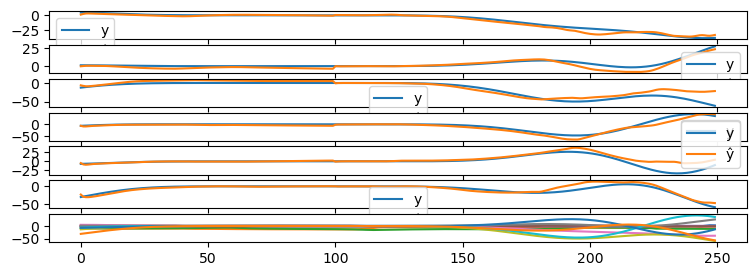

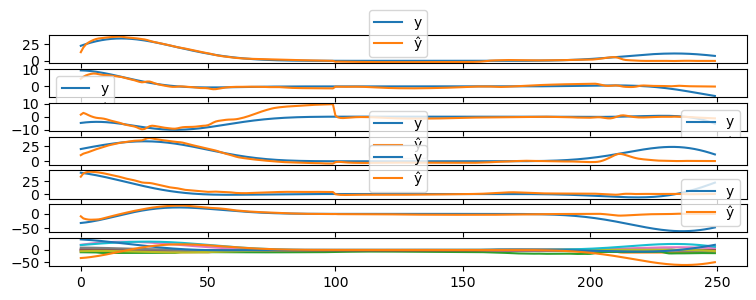

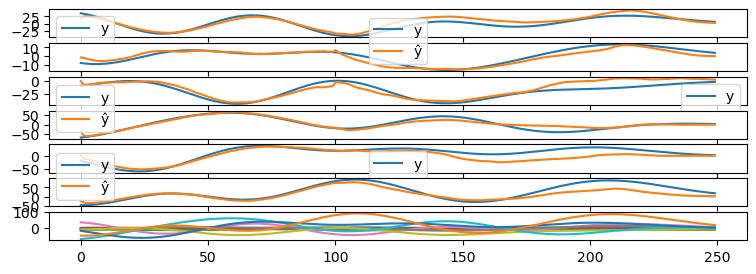

In [ ]:
dls = dict_dls_fransys[dl]()
lrn = Learner(dls,model,loss_func=SkipNLoss(mae,init_sz),
                metrics=[SkipNLoss(rmse,init_sz),
                        SkipNLoss(nrmse_std,init_sz),
                        SkipNLoss(nrmse,init_sz)])
lrn.show_results(max_n=3)

In [ ]:
dls = dict_dls_fransys_test[dl](valid_stp_sz=1)
# dls = create_dls_ship_prediction_test_ood()
lrn = Learner(dls,model,loss_func=SkipNLoss(mae,init_sz),
                metrics=[SkipNLoss(rmse,init_sz),
                        SkipNLoss(nrmse_std,init_sz),
                        SkipNLoss(nrmse,init_sz)])
lrn.validate()

(#4) [16.324901580810547,23.898448944091797,4.45585823059082,1.0138919353485107]

In [ ]:
dls = dict_dls_fransys_test[dl](pred_sz=60,valid_stp_sz=60)
# dls = create_dls_ship_prediction_test_ood()
lrn = Learner(dls,model,loss_func=SkipNLoss(mae,init_sz),
                metrics=[SkipNLoss(rmse,init_sz),
                        SkipNLoss(nrmse_std,init_sz),
                        SkipNLoss(nrmse,init_sz)])
lrn.add_cb(TbpttResetCB())
lrn.validate()

(#4) [7.480922222137451,12.425759315490723,2.222777843475342,0.4677219092845917]

/home/pheenix/Development/seqdata/seqdata/core.py:880: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


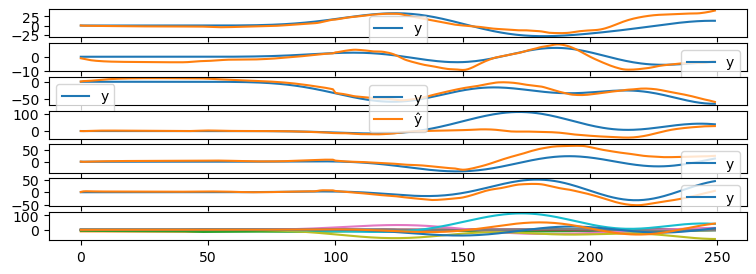

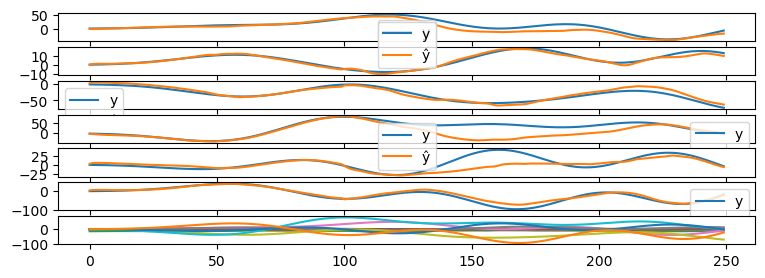

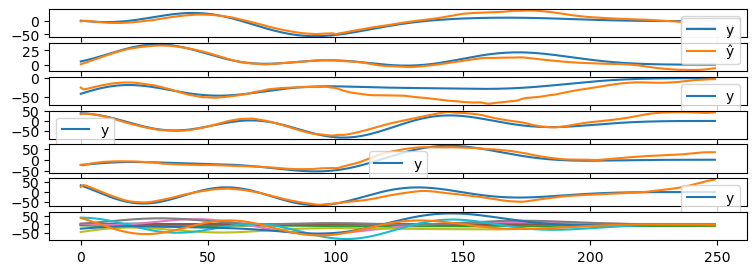

In [ ]:
lrn.show_results(max_n=3)

In [ ]:
lrn.validate()

(#2) [0.19184163212776184,0.31811001896858215]